In [2]:
import numpy as np
import nibabel as nib
import glob
import shutil
import os
from os.path import join
from os import listdir
import matplotlib.pyplot as plt

In [3]:
data_path = '/content/TrainingSet'
images_path = os.path.join(data_path, 'images')
labels_path = os.path.join(data_path, 'labels')

images = sorted(glob.glob(os.path.join(images_path, '*')))
labels = sorted(glob.glob(os.path.join(labels_path, '*')))
len(images), len(labels)

(263, 262)

In [4]:
outliers = []
for img in images:
    img_name = img.split(os.sep)[-1]
    if not os.path.exists(os.path.join(labels_path, img_name)):
        outliers.append(img_name)
        print(img_name)
        images.remove(join(images_path, img_name))
len(images), len(labels)

hippocampus_118.nii.gz


(262, 262)

In [5]:
outliers = []
threshold = 60
for img in images:
    img_x, img_y, img_z = nib.load(img).get_fdata().shape
    if (img_x > threshold) | (img_y > threshold) | (img_z > threshold):
        outliers.append(img)
        print(img)
        print(img_x, img_y, img_z)
for img in outliers:
    images.remove(img)
    img_name = img.split(os.sep)[-1]
    labels.remove(join(labels_path, img_name))
len(images), len(labels)

/content/TrainingSet/images/hippocampus_010.nii.gz
512 512 241
/content/TrainingSet/images/hippocampus_281.nii.gz
512 512 31


(260, 260)

In [6]:
image = nib.load(images[0]).get_fdata()
label = nib.load(labels[0]).get_fdata()
image.shape, label.shape

((35, 51, 35), (35, 51, 35))

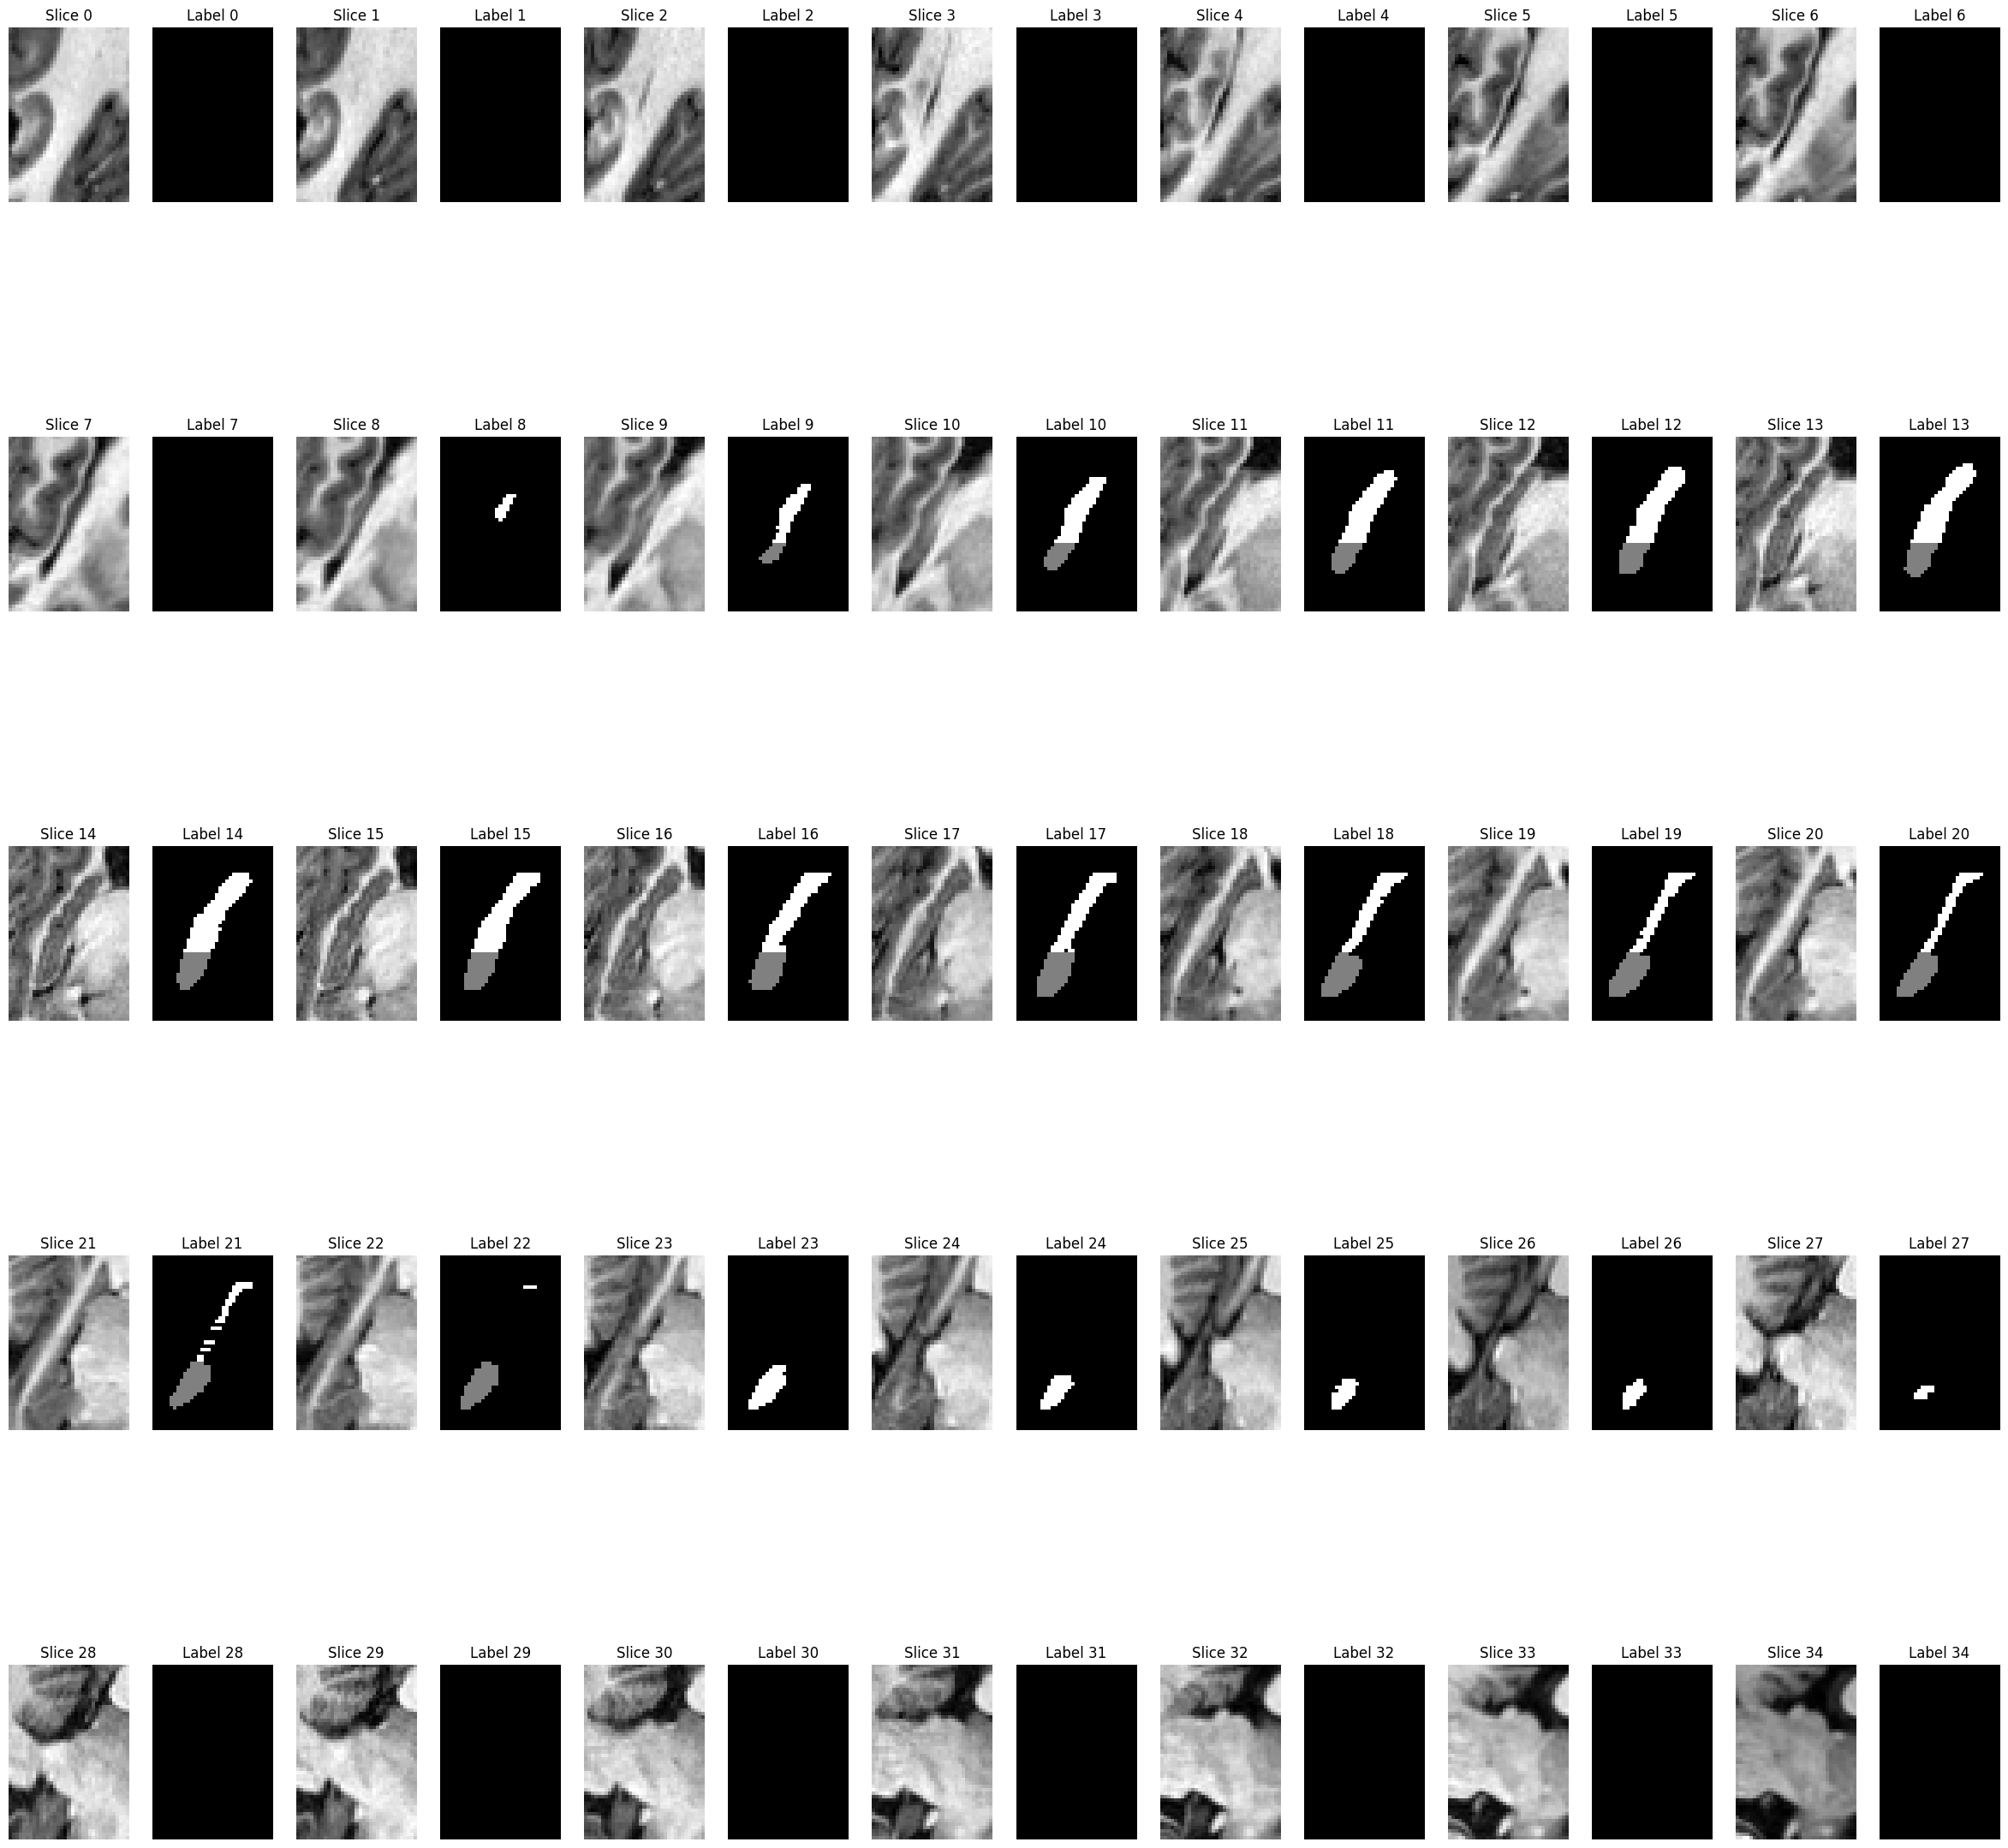

In [7]:
fig, ax = plt.subplots(5, 7*2, figsize=[30,30])

for i in range(35):
    if (i < len(image)):
        ax[int(i/7), 2*int(i%7)].set_title(f"Slice {i}")
        ax[int(i/7), 2*int(i%7)].imshow(image[i], cmap='gray')

        ax[int(i/7), 2*int(i%7) + 1].set_title(f"Label {i}")
        ax[int(i/7), 2*int(i%7) + 1].imshow(label[i], cmap='gray')

        ax[int(i/7), 2*int(i%7)].axis("off")
        ax[int(i/7), 2*int(i%7)+1].axis("off")

plt.show()

In [8]:
img = nib.load(images[0])
print('Format of the image: ', img.header_class)
img.header.keys()

Format of the image:  <class 'nibabel.nifti1.Nifti1Header'>


['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [9]:
print('Bits per pixels: ',img.header['bitpix'])

Bits per pixels:  8


In [10]:
print('Units of measurement: ',img.header['xyzt_units'])

Units of measurement:  10


In [11]:
print('Grid Spacing: ', img.header['pixdim'])

Grid Spacing:  [1. 1. 1. 1. 1. 0. 0. 0.]


In [12]:
print('Dimension: ', img.header['dim'])

Dimension:  [ 3 35 51 35  1  1  1  1]


In [13]:
print("Hippocamus Volume: ",np.sum(nib.load(labels[0]).get_fdata() != 0))

Hippocamus Volume:  2948


In [14]:
def volume_cal (index):
    return np.sum(nib.load(labels[index]).get_fdata() != 0)

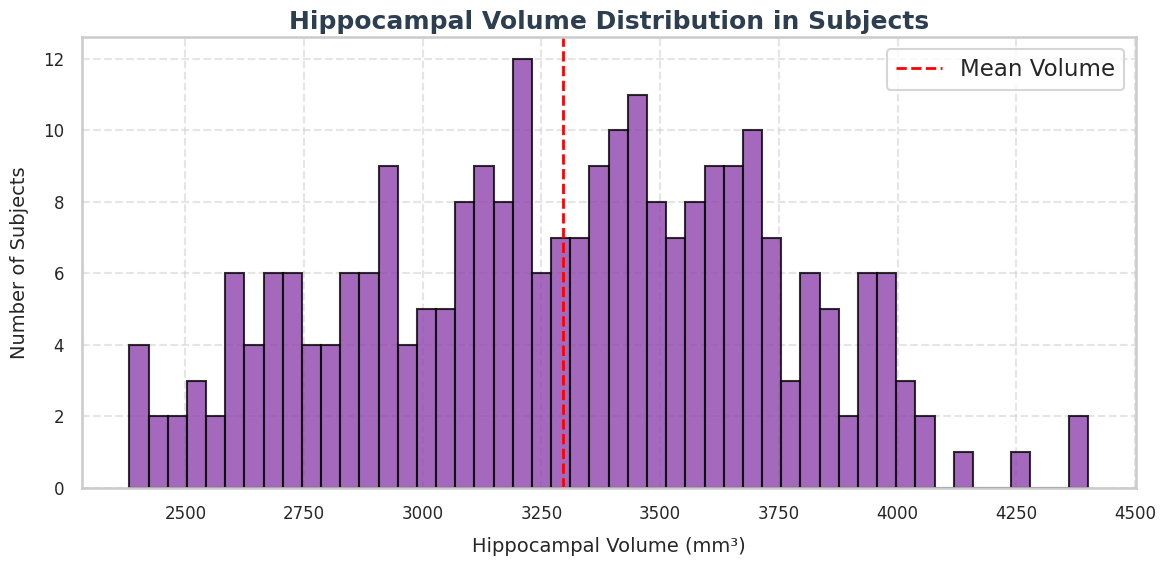

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

volume = [volume_cal(i) for i in range(len(labels))]
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))

plt.hist(volume, bins=50, color='#8e44ad', edgecolor='black', alpha=0.8)

plt.title('Hippocampal Volume Distribution in Subjects', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xlabel('Hippocampal Volume (mm³)', fontsize=14, labelpad=10)
plt.ylabel('Number of Subjects', fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axvline(x=sum(volume)/len(volume), color='red', linestyle='--', linewidth=2, label='Mean Volume')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()